### 1.学习理解什么是极大似然估计

略

### 2. 使用pandas中的函数，下载上证综指过去一年的收盘数据，以此来计算日收益率序列，对这个数据画出直方图，计算这组数据的各个描述性统计量

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [50]:
sz=pd.read_csv('zhishu.csv')

In [51]:
sz.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015/12/31,3539.18,3539.18,3539.18,3539.18,0,3539.18
1,2015/12/29,3563.74,3563.74,3563.74,3563.74,0,3563.74
2,2015/12/28,3533.78,3533.78,3533.78,3533.78,0,3533.78
3,2015/12/25,3627.91,3627.91,3627.91,3627.91,0,3627.91
4,2015/12/24,3612.49,3612.49,3612.49,3612.49,0,3612.49


In [52]:
sz.describe()

,Open,High,Low,Close,Volume,Adj Close
count,233.000000,233.000000,233.000000,233.000000,233,233.000000
mean,3739.794893,3739.794893,3739.794893,3739.794893,0,3739.794893
std,538.105387,538.105387,538.105387,538.105387,0,538.105387
min,2927.290000,2927.290000,2927.290000,2927.290000,0,2927.290000
25%,3320.680000,3320.680000,3320.680000,3320.680000,0,3320.680000
50%,3617.060000,3617.060000,3617.060000,3617.060000,0,3617.060000
75%,4034.310000,4034.310000,4034.310000,4034.310000,0,4034.310000
max,5166.350000,5166.350000,5166.350000,5166.350000,0,5166.350000


In [53]:
#感谢 @MatrixXT的笔记，这里借用了他的方法计算日收益率序列，再次感谢！
Rt = np.log(sz['Close']/sz['Close'].shift(1)).dropna()#ln(Close_t/Close_t-1)
Rt.head()

1    0.006915
2   -0.008442
3    0.026289
4   -0.004259
5    0.006512
Name: Close, dtype: float64

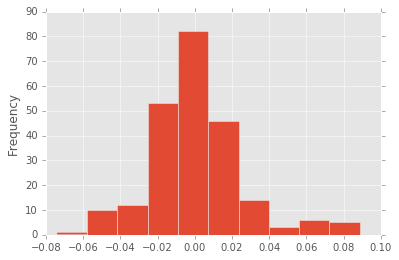

In [54]:
Rt.plot.hist();

In [57]:
sz['RED']=Rt

In [58]:
sz.head()

,Date,Open,High,Low,Close,Volume,Adj Close,RED
0,2015/12/31,3539.18,3539.18,3539.18,3539.18,0,3539.18,NaN
1,2015/12/29,3563.74,3563.74,3563.74,3563.74,0,3563.74,0.006915
2,2015/12/28,3533.78,3533.78,3533.78,3533.78,0,3533.78,-0.008442
3,2015/12/25,3627.91,3627.91,3627.91,3627.91,0,3627.91,0.026289
4,2015/12/24,3612.49,3612.49,3612.49,3612.49,0,3612.49,-0.004259


In [60]:
np.mean(sz['RED'])

-0.00023611855268832138

In [63]:
Rt.min(),Rt.max()

(-0.074123414633409976, 0.088729056091908176)

In [64]:
Rt.mean(),Rt.median()

(-0.00023611855268832138, -0.002579985291206345)

In [65]:
Rt.var(),Rt.std()

(0.0006464512749699959, 0.025425406092528708)

### 3. 对上述收益率数据，使用参数方法和非参数方法估计其概率密度函数。参数方法选择正态分布和对数正态分布两种假设。基于上述三种方法分别计算收益率小于0的概率。

In [75]:
X = stats.norm(Rt.mean(),Rt.var())

In [67]:
X.cdf([0])

array([ 0.64253889])

In [78]:
X=np.random.rand(100)

TypeError: 'AxesSubplot' object does not support indexing

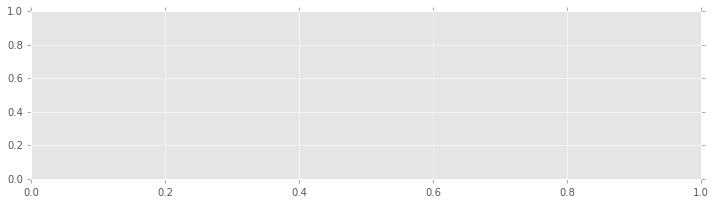

In [80]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

axes[0].hist(np.random.randn(10000))
axes[0].set_title("2015年上证综指日收益率")

In [ ]:
plt.his()

### 4. 使用pandas中的函数，下载你感兴趣的任意两支股票的数据，计算日收益率序列，使用假设检验来判断这两支股票的平均收益率是否有差别。

对股票数据不是很感兴趣，想通过假设检验的方法，练习下手头的数据

案例背景
- 问题：客户端更新版本后，想了解新用户和老用户对产品易用性的评价是否有差异。
- 数据：通过系统可用性量表（SUS）,调查到了新老用户的sus得分情况（sus2.csv）

In [128]:
from scipy import stats
from scipy import optimize
from scipy.stats import ttest_ind

In [117]:
sus=pd.read_csv('sus2.csv')

In [118]:
sus.head()

,Unnamed: 0,groupA,groupB
0,P1,72.5,72.5
1,P2,87.5,65.0
2,P3,72.5,67.5
3,P4,47.5,90.0
4,P5,30.0,35.0


In [119]:
A=sus['groupA']

In [120]:
type(sus.groupA)

pandas.core.series.Series

In [121]:
B=sus['groupB']

In [131]:
#检验两组数据的方差齐性
from scipy.stats import levene
print levene(A,B)

LeveneResult(statistic=0.61304736371760504, pvalue=0.44668587509532265)


In [132]:
#P>0.05,方差相等，可以使用t检验

In [133]:
ttest_ind(A,B)

Ttest_indResult(statistic=-1.1086155700906273, pvalue=0.28627811608091658)

In [134]:
#statistic : float or array.The calculated t-statistic.
#pvalue : float or array.The two-tailed p-value.

#P>0.05,不显著，groupA新用户&groupB老用户对新版的易用性体验评价无显著差异。